In [4]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# git pull | git add . | git commit -m "update" | git push

In [15]:
# Read the file

df = pd.read_csv('mergedTrainingData.csv')
df_cfb = pd.DataFrame(df)

home_team = df_cfb[df_cfb['home_game'] == 'True']
away_team = df_cfb[df_cfb['home_game'] == 'False']


df_cfb.sort_values(by = ['week', 'season'])


,Unnamed: 0,week,season,Team,opponent,code,date,win_loss,OT,OT_num,...,home_game,CONF,SOR,FPI,SOS,GC,AVGWP,AP_rank,opponent_rank,rank_change
2238,2239,2,2021,Air Force,Navy,2005,"Sat, Sep 11",W,False,NaN,...,False,Mountain West,33,66,110,24,6,NaN,NaN,NaN
2239,2240,2,2021,Akron,Temple,2006,"Sat, Sep 11",L,False,NaN,...,True,MAC,127,128,67,118,125,NaN,NaN,0.0
2240,2241,2,2021,Arizona,San Diego State,12,"Sat, Sep 11",L,False,NaN,...,True,Pac-12,122,106,71,110,122,NaN,NaN,0.0
2241,2242,2,2021,Arizona State,UNLV,9,"Sat, Sep 11",W,False,NaN,...,True,Pac-12,49,39,61,61,63,25.0,NaN,NaN
2242,2243,2,2021,Arkansas,Texas,8,"Sat, Sep 11",W,False,NaN,...,True,SEC,14,21,2,20,41,NaN,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2234,17,2024,SMU,Penn State,2567,"Sat, Dec 21",L,False,NaN,...,False,ACC,18,13,41,18,16,NaN,NaN,15.0
2234,2235,18,2024,Notre Dame,Ohio State,87,"Mon, Jan 20",L,False,NaN,...,True,FBS Indep.,3,3,4,4,5,NaN,NaN,0.0
2235,2236,18,2024,Ohio State,Notre Dame,194,"Mon, Jan 20",W,False,NaN,...,True,Big Ten,1,1,2,1,1,NaN,NaN,0.0
2236,2237,18,2024,Penn State,Notre Dame,213,"Thu, Jan 9",L,False,NaN,...,True,Big Ten,6,6,10,8,13,NaN,NaN,21.0


# Passing, Rushing and Receiving yards gained

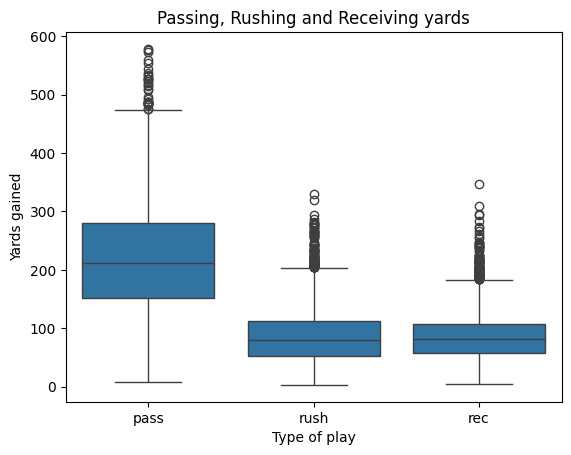

In [8]:
# Create a boxplot comparing passing and rushing yards.
df_cfb_long = pd.melt(df_cfb, value_vars=['pass', 'rush', 'rec'], var_name='type', value_name='yards')

df_cfb_long['yards'] = pd.to_numeric(df_cfb_long['yards'], errors='coerce')

sb.boxplot(data=df_cfb_long, x='type', y='yards')

plt.title('Passing, Rushing and Receiving yards')
plt.xlabel('Type of play')
plt.ylabel('Yards gained')

plt.show()

# Descriptive Statistics

In [5]:
mean_points_scored = df_cfb.groupby('home_game')['points_scored'].describe()
print(mean_points_scored)

mean_points_allowed = df_cfb.groupby('home_game')['points_allowed'].describe()
print(mean_points_allowed)


            count       mean        std  min   25%   50%   75%   max
home_game                                                           
Bye         762.0   0.000000   0.000000  0.0   0.0   0.0   0.0   0.0
FALSE      3366.0  25.335116  13.204326  0.0  16.0  24.0  34.0  73.0
TRUE       4420.0  30.565158  14.444095  0.0  20.0  30.0  41.0  87.0
            count       mean        std  min   25%   50%   75%   max
home_game                                                           
Bye         762.0   0.000000   0.000000  0.0   0.0   0.0   0.0   0.0
FALSE      3366.0  29.387998  13.671494  0.0  20.0  28.0  38.0  77.0
TRUE       4420.0  24.222624  13.410359  0.0  14.0  23.0  34.0  73.0


C:\Users\joshg\AppData\Local\Temp\ipykernel_99964\1765544488.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=df_cfb, x='points_scored',  fill = True, hue = 'home_game')


AttributeError: module 'matplotlib.pyplot' has no attribute 'vline'

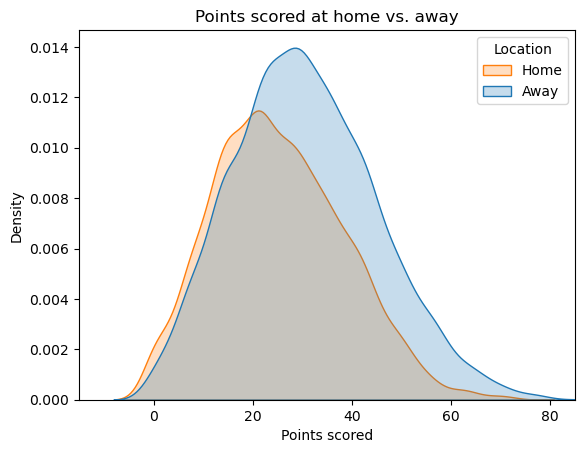

In [8]:
# Create a scatterplot of point scored at home vs. away.
sb.kdeplot(data=df_cfb, x='points_scored',  fill = True, hue = 'home_game')

plt.title('Points scored at home vs. away')
plt.xlabel('Points scored')
plt.ylabel('Density')

labels = ['Home', 'Away']
plt.legend(title='Location', labels=labels)
plt.xlim(-15, 85)
plt.vline(x = 5)

plt.show()

C:\Users\joshg\AppData\Local\Temp\ipykernel_99964\2326894479.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=df_cfb, x='points_allowed',  fill = True, hue = 'home_game')


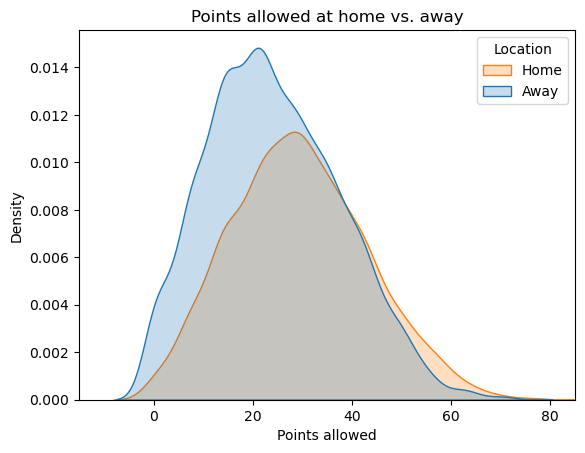

In [9]:
# Create a scatterplot of point allowed at home vs. away.
sb.kdeplot(data=df_cfb, x='points_allowed',  fill = True, hue = 'home_game')

plt.title('Points allowed at home vs. away')
plt.xlabel('Points allowed')
plt.ylabel('Density')

labels = ['Home', 'Away']
plt.legend(title='Location', labels=labels)
plt.xlim(-15, 85)

plt.show()

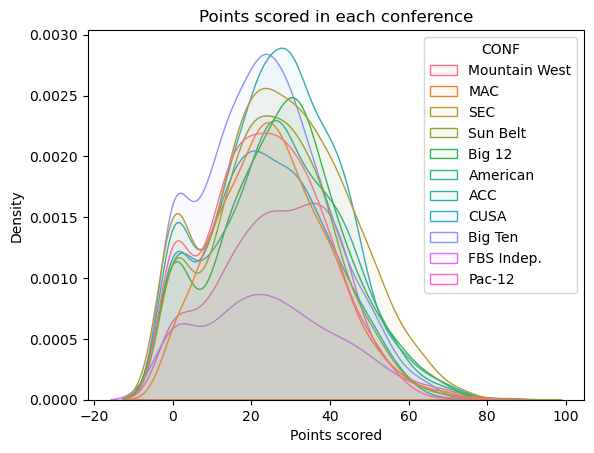

In [10]:
sb.kdeplot(data=df_cfb, x='points_scored',  fill = True, hue = 'CONF', alpha = 0.05)

plt.title('Points scored in each conference')
plt.xlabel('Points scored')
plt.ylabel('Density')

#labels = ['Home', 'Away']
#plt.legend(title='Location', labels=labels)    

plt.show()


In [10]:
import pandas as pd
import numpy as np

# --- 1. Data Loading and Cleaning ---
# Load the dataset
df = pd.read_csv('mergedTrainingData.csv')

# --- 2. Date Parsing and Sorting for Chronology ---
# The original 'date' column is missing the year. We combine it with 'season' for correct parsing.
df.rename(columns={'win_loss': 'Result'}, inplace=True)

# 2a. Create a full date string: 'Month Day, Year'
# We use a regex check to ensure we only try to parse valid game dates (e.g., 'Sat, Nov 16')
df['full_date_str'] = np.where(
    df['date'].astype(str).str.contains(r'^[A-Za-z]{3},\s[A-Za-z]{3}\s\d{1,2}$', na=False),
    df['date'].astype(str).str.split(',').str[-1].str.strip() + ', ' + df['season'].astype(str),
    np.nan
)

# 2b. Convert to datetime object and handle non-game rows (like 'Bye')
df['game_date'] = pd.to_datetime(df['full_date_str'], errors='coerce')

# Filter for games that have a 'Win' or 'Loss' result and valid dates/differentials
df_games = df[df['Result'].isin(['W', 'L'])].dropna(subset=['game_date', 'point_differential'])

# Convert point_differential to numeric
df_games['point_differential'] = pd.to_numeric(df_games['point_differential'])

# Sort the DataFrame by the actual game date (Crucial for sequential Elo updates)
df_games.sort_values(by='game_date', inplace=True)

# Reset index to make iteration cleaner
df_games.reset_index(drop=True, inplace=True)


# --- 3. Elo Rating System Implementation ---

# Initialize Elo ratings for all teams
initial_elo = 1500
elo_ratings = {}

# K-factor (determines the magnitude of rating change)
K = 32

def calculate_elo_change(r_a, r_b, result, point_differential, k_factor):
    """
    Calculates the change in Elo rating for Team A, including a Margin of Victory (MoV) adjustment.
    """
    # 1. Expected Win Probability (E_A) for Team A
    e_a = 1 / (1 + 10**((r_b - r_a) / 400))

    # 2. Actual Score (S_A): 1 for Win, 0 for Loss
    s_a = 1 if result == 'W' else 0

    # 3. Margin of Victory (MoV) Multiplier
    # This is a simple adjustment to increase the K-factor for blowouts.
    # It is a common simplified MoV adjustment that scales by the point difference.
    mov_multiplier = np.log(abs(point_differential) + 1) * 2.2 / (abs(r_a - r_b) / 400 + 2.2)
    # Clamp the multiplier to prevent extreme changes on massive blowouts
    mov_multiplier = np.clip(mov_multiplier, 0.5, 3.0)

    # 4. Final Elo Change Formula: K' * (S_A - E_A)
    delta_elo = k_factor * mov_multiplier * (s_a - e_a)

    return delta_elo

# List to store the Elo ratings for merging back later
elo_history = []

# Populate initial ratings dictionary
all_teams = pd.concat([df_games['Team'], df_games['opponent']]).unique()
for team in all_teams:
    elo_ratings[team] = initial_elo

# Iterate through each game chronologically
for index, row in df_games.iterrows():
    team_a = row['Team']
    team_b = row['opponent']
    result_a = row['Result']
    diff = row['point_differential']

    # Retrieve current ratings (will be initial_elo if it's the team's first game)
    r_a = elo_ratings.get(team_a, initial_elo)
    r_b = elo_ratings.get(team_b, initial_elo)

    # Calculate Elo change for Team A
    delta_a = calculate_elo_change(r_a, r_b, result_a, diff, K)

    # Elo is a zero-sum system: Team B's change is the negative of Team A's
    delta_b = -delta_a

    # Calculate new ratings
    new_r_a = r_a + delta_a
    new_r_b = r_b + delta_b

    # Store the POST-GAME Elo rating for Team A in the history
    elo_history.append({
        'game_date': row['game_date'],
        'Team': team_a,
        'Team_Elo_Rating': new_r_a
    })

    # Update the ratings dictionary for the next game
    elo_ratings[team_a] = new_r_a
    elo_ratings[team_b] = new_r_b


# --- 4. Final Merge and Output ---

# Convert the history to a DataFrame
elo_df = pd.DataFrame(elo_history)

# Merge the new Elo ratings back into the original game data
final_df = df_games.merge(elo_df, on=['game_date', 'Team'], how='left')

# Select and display the relevant columns to show the result
final_output = final_df[[
    'season', 'game_date', 'Team', 'opponent', 'Result',
    'point_differential', 'Team_Elo_Rating'
]].sort_values(by=['game_date', 'Team'])

print("\n--- Final Output Sample (First 10 Games) ---")
print(final_output.head(10).to_string(index=False))

# Save the final DataFrame
final_output.to_csv('College_Football_Elo_Rankings.csv', index=False)


--- Final Output Sample (First 10 Games) ---
 season  game_date         Team       opponent Result  point_differential  Team_Elo_Rating
   2021 2021-01-01     Arkansas     Penn State      W                  14      1543.328803
   2021 2021-01-01     Kentucky           Iowa      W                   3      1522.180710
   2021 2021-01-01   Notre Dame Oklahoma State      L                  -2      1482.422203
   2021 2021-01-01   Ohio State           Utah      W                   3      1522.180710
   2021 2021-01-01     Ole Miss         Baylor      L                 -14      1456.671197
   2021 2021-01-01   Penn State       Arkansas      L                 -14      1426.865890
   2021 2021-01-04 Kansas State            LSU      W                  22      1581.043572
   2021 2021-01-04          LSU   Kansas State      L                 -22      1452.000000
   2021 2021-01-10      Alabama        Georgia      L                 -15      1425.412916
   2021 2021-01-10      Georgia        Alaba

C:\Users\joshg\AppData\Local\Temp\ipykernel_89968\2775576955.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


KeyError: 'season'